In [1]:
# 所用到的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from typing import List
import math
import os
os.makedirs('result', exist_ok=True)
sns.set_palette("pastel", 8)
plt.rcParams['font.sans-serif'] = 'simhei'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 读入新冠数据
covid_df = pd.read_csv('china_provincedata1.csv' ,encoding='gbk')
covid_df.head()

,id,confirmedCount,confirmedIncr,curedCount,curedIncr,currentConfirmedCount,currentConfirmedIncr,dateId,deadCount,deadIncr,suspectedCount,suspectedCountIncr,provinceName,provinceShortName
0,1,5,5,0,0,5,5,20200120,0,0,0,0,北京市,北京
1,2,10,5,0,0,10,5,20200121,0,0,0,0,北京市,北京
2,3,14,4,0,0,14,4,20200122,0,0,0,0,北京市,北京
3,4,26,12,0,0,26,12,20200123,0,0,0,0,北京市,北京
4,5,36,10,0,0,36,10,20200124,0,0,0,0,北京市,北京


In [3]:
# 读入鸢尾花数据
iris_df = pd.read_csv('iris.csv' ,encoding='gbk', header=None)
# 重新设置数据列名
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'category']
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,category
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# 鸢尾花数据描述
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [5]:
# 新冠数据描述
covid_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5534.0,2.767500e+03,1597.672526,1.0,1384.25,2767.5,4150.75,5534.0
confirmedCount,5534.0,2.183458e+03,10608.243347,1.0,120.25,254.0,712.75,68135.0
confirmedIncr,5534.0,1.540983e+01,243.365223,-5.0,0.00,0.0,1.00,14840.0
curedCount,5534.0,1.771602e+03,9086.809817,0.0,73.00,189.0,612.75,64435.0
curedIncr,5534.0,1.447452e+01,135.429860,-948.0,0.00,0.0,2.00,3203.0
currentConfirmedCount,5534.0,3.106753e+02,2928.117354,0.0,0.00,5.0,45.75,50633.0
currentConfirmedIncr,5534.0,9.541019e-02,247.195785,-2926.0,-1.00,0.0,0.00,13796.0
dateId,5534.0,2.020040e+07,155.821868,20200119.0,20200302.00,20200412.0,20200523.00,20200702.0
deadCount,5534.0,1.011807e+02,611.834674,0.0,0.00,2.0,6.00,4512.0
deadIncr,5534.0,8.398988e-01,18.776252,0.0,0.00,0.0,0.00,1290.0


In [6]:
# 鸢尾花数据描述
for col in iris_df.columns[:-1]:  # 除去最后一列
    print(f'{col} column:\ttotal:{len(iris_df[col])},'
            +f'\tmean:{iris_df[col].mean():0.5f},'
            +f'\tstd:{iris_df[col].std():0.5f},'
            +f'min:{iris_df[col].min():0.5f},'
            +f'max:{iris_df[col].max():0.5f},')

sepal_length column:	total:150,	mean:5.84333,	std:0.82807,min:4.30000,max:7.90000,
sepal_width column:	total:150,	mean:3.05400,	std:0.43359,min:2.00000,max:4.40000,
petal_length column:	total:150,	mean:3.75867,	std:1.76442,min:1.00000,max:6.90000,
petal_width column:	total:150,	mean:1.19867,	std:0.76316,min:0.10000,max:2.50000,


In [7]:
# 新冠数据描述
no_need_to_desc_cols = ['id', 'dateId', 'provinceName', 'provinceShortName']

for col in covid_df.columns:
    if col in no_need_to_desc_cols:  # 如果不需要描述则跳过
        continue

    print(f'{col} column:\ttotal:{len(covid_df[col])},'
            +f'\tmean:{covid_df[col].mean():0.5f},'
            +f'\tstd:{covid_df[col].std():0.5f},'
            +f'min:{covid_df[col].min():0.5f},'
            +f'max:{covid_df[col].max():0.5f},')

confirmedCount column:	total:5534,	mean:2183.45790,	std:10608.24335,min:1.00000,max:68135.00000,
confirmedIncr column:	total:5534,	mean:15.40983,	std:243.36522,min:-5.00000,max:14840.00000,
curedCount column:	total:5534,	mean:1771.60192,	std:9086.80982,min:0.00000,max:64435.00000,
curedIncr column:	total:5534,	mean:14.47452,	std:135.42986,min:-948.00000,max:3203.00000,
currentConfirmedCount column:	total:5534,	mean:310.67528,	std:2928.11735,min:0.00000,max:50633.00000,
currentConfirmedIncr column:	total:5534,	mean:0.09541,	std:247.19579,min:-2926.00000,max:13796.00000,
deadCount column:	total:5534,	mean:101.18070,	std:611.83467,min:0.00000,max:4512.00000,
deadIncr column:	total:5534,	mean:0.83990,	std:18.77625,min:0.00000,max:1290.00000,
suspectedCount column:	total:5534,	mean:21.17293,	std:71.54040,min:0.00000,max:394.00000,
suspectedCountIncr column:	total:5534,	mean:0.27105,	std:10.00392,min:-241.00000,max:342.00000,


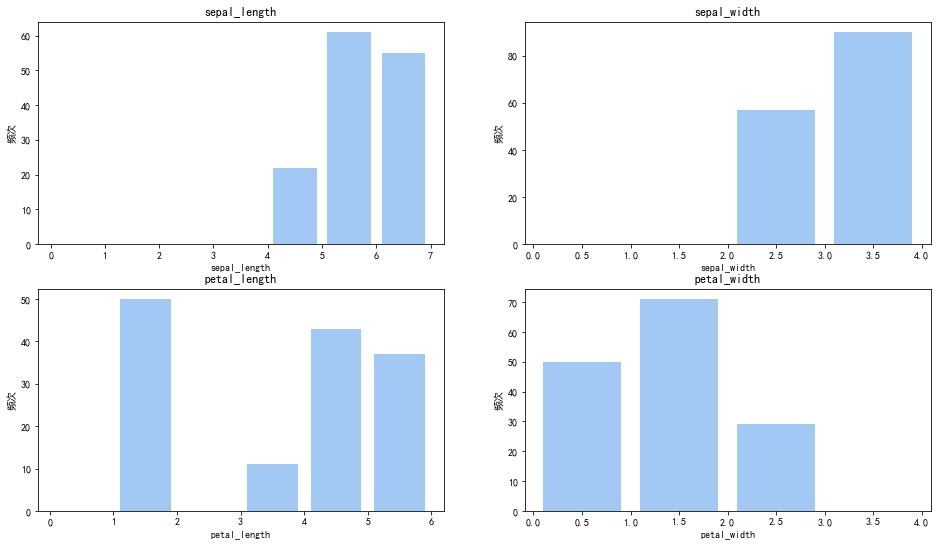

In [8]:
# 鸢尾花直方图
fig = plt.figure(figsize=(16, 9))
plt.tight_layout()
for idx, col in enumerate(iris_df.columns[:-1]):
    plt.subplot(2, 2, idx+1)
    
    plt.hist(iris_df[col], range(0, max(5, math.ceil(iris_df[col].max()))), histtype='bar', rwidth=0.8)
    plt.title(col)
    plt.xlabel(f'{col}')
    plt.ylabel(f'频次')

plt.savefig(os.path.join('result', 'hist.png'))
plt.show()

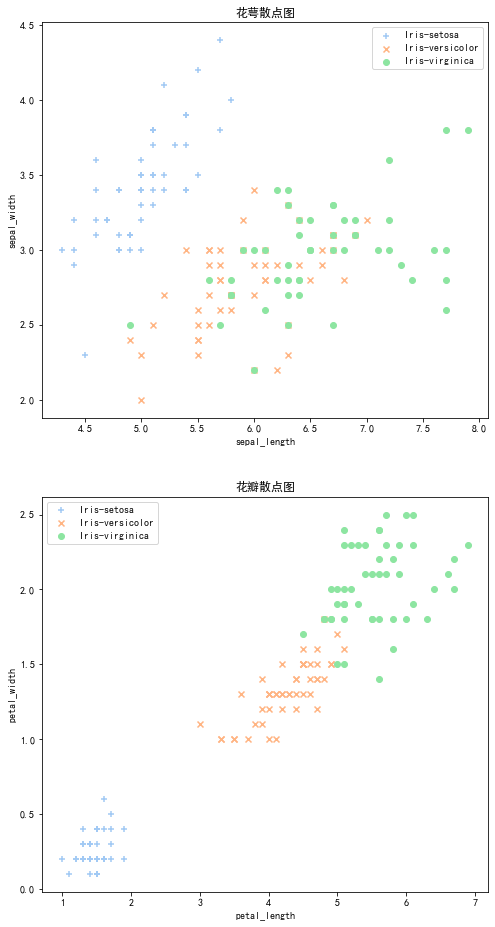

In [9]:
# 鸢尾花花萼散点图
fig = plt.figure(figsize=(8, 16))
ax = plt.subplot(2, 1, 1)
category_color = {'Iris-setosa': 'b', 'Iris-versicolor': 'r', 'Iris-virginica':'g'}
category_marker = {'Iris-setosa': '+', 'Iris-versicolor': 'x', 'Iris-virginica':'o'}

for cat in pd.unique(iris_df['category']):
    cat_df = iris_df[iris_df['category'] == cat]
    plt.scatter(cat_df['sepal_length'], cat_df['sepal_width'], marker=category_marker[cat], label=cat)

ax.set_title('花萼散点图')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()



# 鸢尾花花瓣散点图
ax = plt.subplot(2, 1, 2)
for cat in pd.unique(iris_df['category']):
    cat_df = iris_df[iris_df['category'] == cat]
    plt.scatter(cat_df['petal_length'], cat_df['petal_width'], marker=category_marker[cat], label=cat)

ax.set_title('花瓣散点图')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()


plt.savefig(os.path.join('result', 'scatter.png'))
plt.show()

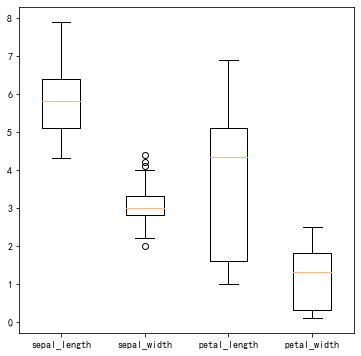

In [10]:
# 鸢尾花数据盒图
iris_df_tmp = iris_df.drop(columns=['category'])
plt.figure(figsize=(6, 6))
plt.boxplot(x=iris_df_tmp.values, labels=iris_df_tmp.columns, whis=1.5)
plt.savefig(os.path.join('result', 'boxplot.png'))
plt.show()

In [11]:
# 鸢尾花分位数
for col in iris_df.columns[:-1]:
    Q1 = iris_df[col].describe()['25%']
    Q2 = iris_df[col].describe()['50%']
    Q3 = iris_df[col].describe()['75%']
    print(f'{col}:\t第一四分位数:{Q1:0.2f},\t第二四分位数:{Q2:0.2f},\t第三四分位数:{Q3:0.2f}')

sepal_length:	第一四分位数:5.10,	第二四分位数:5.80,	第三四分位数:6.40
sepal_width:	第一四分位数:2.80,	第二四分位数:3.00,	第三四分位数:3.30
petal_length:	第一四分位数:1.60,	第二四分位数:4.35,	第三四分位数:5.10
petal_width:	第一四分位数:0.30,	第二四分位数:1.30,	第三四分位数:1.80


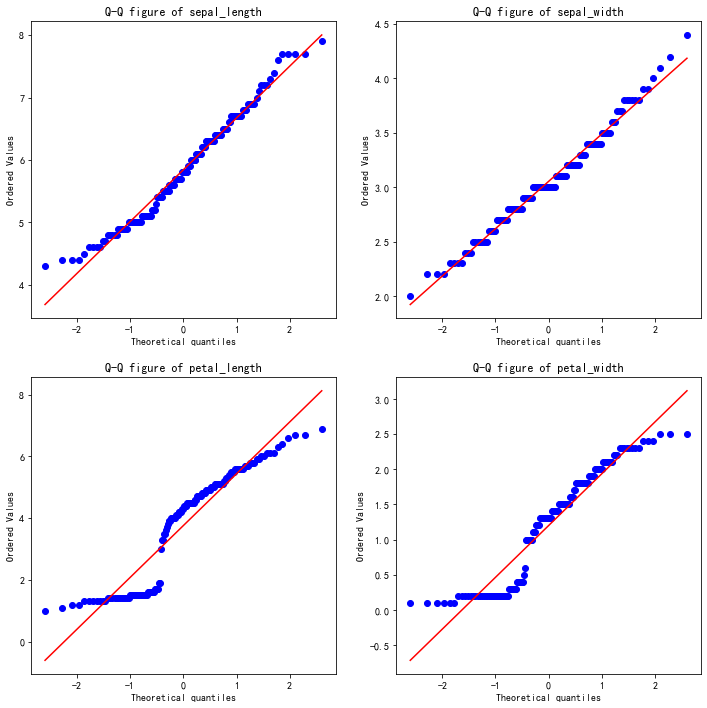

In [12]:
# 鸢尾花Q-Q图
fig = plt.figure(figsize=(12, 12))
for idx, col in enumerate(iris_df.columns[:-1]):
    ax = fig.add_subplot(2, 2, idx+1)
    stats.probplot(iris_df[col], dist='norm', plot=ax)
    ax.set_title(f'Q-Q figure of {col}')
    
plt.savefig(os.path.join('result', f'Q-Q.png'))
plt.show()

In [13]:
# 鸢尾花卡方检验筛选特征
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#选择K个最好的特征，返回选择特征后的数据
ch2 = SelectKBest(chi2, k=3)
selected_data = ch2.fit_transform(iris_df.drop(columns=['category']), iris_df['category'])

select_name_index = ch2.get_support(indices=True)
print ("对类别判断影响最大的三个特征属性分布是:", ch2.get_support(indices=False))
print(iris_df.columns[select_name_index])

对类别判断影响最大的三个特征属性分布是: [ True False  True  True]
Index(['sepal_length', 'petal_length', 'petal_width'], dtype='object')


In [14]:
# 鸢尾花相关性分析(皮尔逊积矩系数)
iris_df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


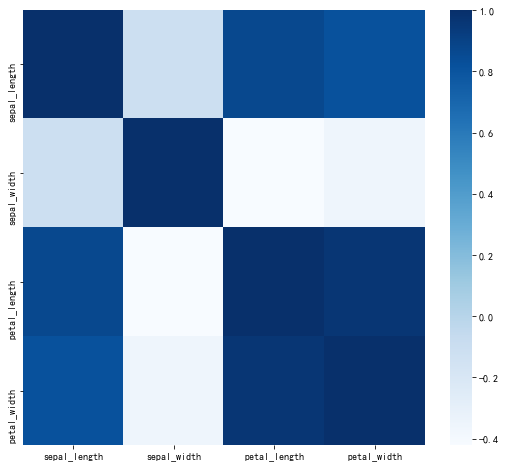

In [15]:
# 相关性系数热力图
plt.figure(figsize=(9, 8))
sns.heatmap(iris_df.corr(), cmap="Blues")
plt.savefig(os.path.join('result', 'corr_heatmap.png'))
plt.show()

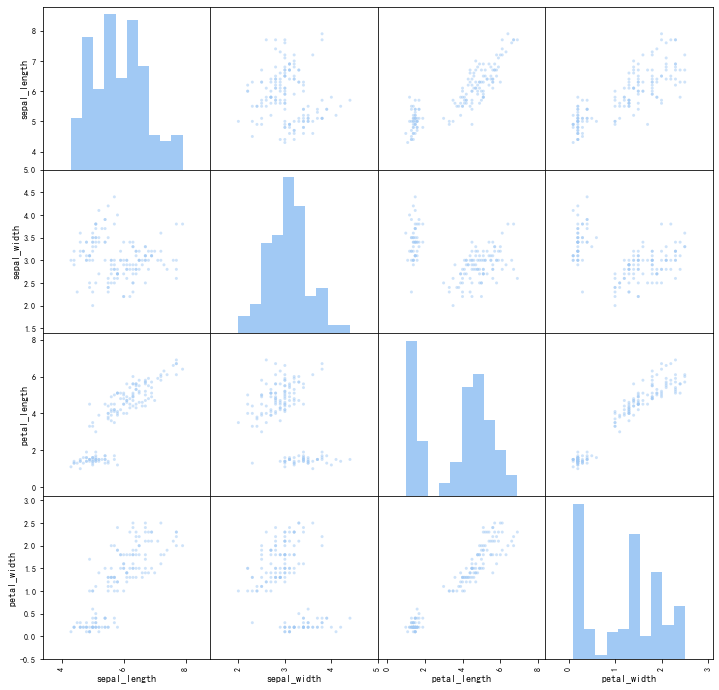

In [16]:
# 相关性分析散点图
pd.plotting.scatter_matrix(iris_df, figsize=(12,12),range_padding=0.5)
plt.savefig(os.path.join('result', 'corr_scatter_matrix.png'))
plt.show()

In [17]:
# 鸢尾花数据协方差
cov = np.cov(iris_df.drop(columns=['category']).T)
cov

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [18]:
# 新冠回归预测
province = '山东'
province_df = covid_df[covid_df['provinceShortName']==province]
province_df = province_df.reset_index(drop=True)
province_df.head()

,id,confirmedCount,confirmedIncr,curedCount,curedIncr,currentConfirmedCount,currentConfirmedIncr,dateId,deadCount,deadIncr,suspectedCount,suspectedCountIncr,provinceName,provinceShortName
0,3758,9,9,0,0,9,9,20200123,0,0,0,0,山东省,山东
1,3759,21,12,0,0,21,12,20200124,0,0,0,0,山东省,山东
2,3760,39,18,0,0,39,18,20200125,0,0,0,0,山东省,山东
3,3761,63,24,0,0,63,24,20200126,0,0,0,0,山东省,山东
4,3762,87,24,0,0,87,24,20200127,0,0,0,0,山东省,山东


In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
y = np.asarray(province_df['confirmedCount']).reshape(-1,)
X = np.asarray(range(0, len(y))).reshape(-1, 1)
lr.fit(X, y)
lr.score(X, y), lr.coef_
# X, y

(0.21604938271604937,
 array([[-9.19715231e-01],
        [-6.46749446e-01],
        [-4.96897991e-01],
        [-4.05276432e-01],
        [-3.43934225e-01],
        [-3.00092943e-01],
        [-2.67066762e-01],
        [-2.41242789e-01],
        [-2.20444249e-01],
        [-2.03300119e-01],
        [-1.89070958e-01],
        [-1.76615062e-01],
        [-1.65997586e-01],
        [-1.56700909e-01],
        [-1.48658460e-01],
        [-1.41251994e-01],
        [-1.34728081e-01],
        [-1.28837565e-01],
        [-1.23507877e-01],
        [-1.18646140e-01],
        [-1.14192894e-01],
        [-1.10098008e-01],
        [-1.06318341e-01],
        [-1.02817564e-01],
        [-9.95647982e-02],
        [-9.65343133e-02],
        [-9.37021666e-02],
        [-9.10492793e-02],
        [-8.85650670e-02],
        [-8.62223266e-02],
        [-8.40139812e-02],
        [-5.71762252e-02],
        [-3.71645489e-02],
        [-2.66639860e-02],
        [-5.92784156e-02],
        [-2.56355768e-02],
      

In [20]:
from datetime import datetime, timedelta
from matplotlib.dates import DayLocator, DateFormatter, drange
start_date = datetime(2020, 1, 23)
end_date = datetime(2020, 9, 1)
date_list = drange(start_date, end_date, timedelta(days=1))
y_pred = lr.predict(np.array(range(len(date_list))).reshape(-1, 1))
y_pred

array([  9,  39, 758, 758, 758, 758, 758, 758, 758, 758, 758, 758, 758,
       758, 758, 758, 758, 758, 758, 758, 758, 758, 758, 758, 758, 758,
       758, 758, 758, 758, 758, 758, 758, 758, 787, 787, 787, 787, 787,
       787, 787, 787, 787, 787, 787, 787, 787, 787, 787, 787, 787, 787,
       788, 788, 788, 788, 788, 788, 788, 788, 788, 788, 788, 788, 788,
       788, 788, 788, 788, 788, 788, 788, 788, 788, 788, 788, 788, 788,
       788, 788, 788, 788, 788, 788, 788, 788, 788, 788, 788, 788, 792,
       792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 792,
       792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 792,
       792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 792,
       792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 792,
       792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 792,
       792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 792,
       792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 792, 79

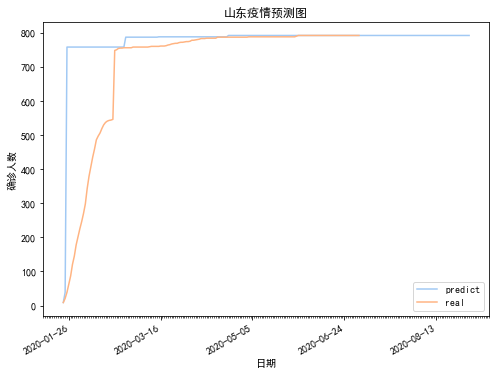

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(date_list, y_pred, label='predict')
plt.plot(date_list[:len(y)], y, label='real')

ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
ax.xaxis.set_minor_locator(DayLocator())
ax.tick_params(axis="both", direction="out", labelsize=10)

fig.autofmt_xdate()
plt.ylabel('确诊人数')
plt.xlabel('日期')
plt.title('山东疫情预测图')
plt.legend()
plt.savefig(os.path.join('result', 'covid_predict.png'))
plt.show()